# Séries temporais decomposição

## Importar bibliotecas

In [7]:
#Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from matplotlib.pylab import rcParams
#tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Conectar com Google Drive

In [8]:
# Conectar com o Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Função para teste de estacionariedade

In [9]:
def teste_ADF(serie):
    # Teste de Dickey-Fuller:
    resultado_teste = adfuller(serie, autolag='AIC')
    # Formata o resultado do teste em um dataframe
    resultado_formatado = pd.Series(resultado_teste[0:4],
                             index=['Estatística do teste','p-value','Lags',
                                    'Quantidade de observações'])
    # Formata os valores c´riticos do teste
    for significancia,valor in resultado_teste[4].items():
        resultado_formatado['Valor crítico (%s)'%significancia] = valor
    # Imprime os resultados
    print ('Resultados do Teste Dickey-Fuller:')
    print (resultado_formatado)

## Leitura de Dados
Dados mensais de requisição diária aos servidores<br>

In [12]:
# Ler os dados
serie_requisicoes_dia = pd.read_csv(
    '/content/servidores_requisicoes_dia.csv', index_col=0, parse_dates=True)
serie_requisicoes_dia.head(3)

,WEB,BD,APLIC
Data,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN


## Série de requisições mensais ao servidor WEB

In [13]:
# Seleciona coluna WEB e reformata para requisições mensais (soma)
serie_requisicoes_WEB_mes = serie_requisicoes_dia['WEB'].resample('M').sum()
serie_requisicoes_WEB_mes.head(3)

,WEB
Data,
2006-01-31,45304.704
2006-02-28,41078.993
2006-03-31,43978.124


### Visualizar requisições mensais ao servidor WEB

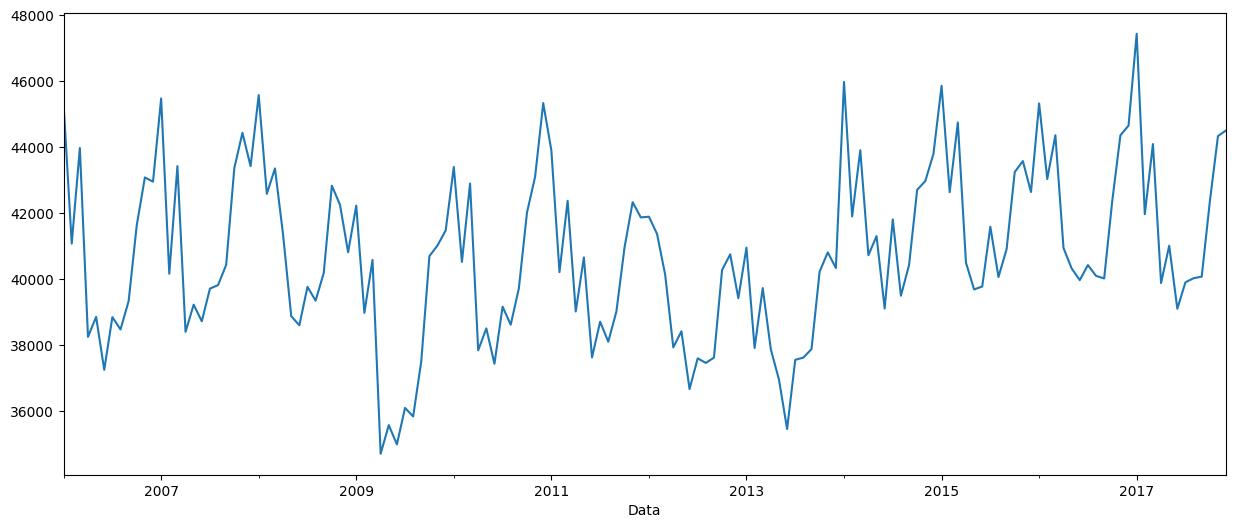

In [14]:
# Plotar WEB
serie_requisicoes_WEB_mes.plot();

## Decompor e plotar a serie de requisições mensal ao servidor WEB

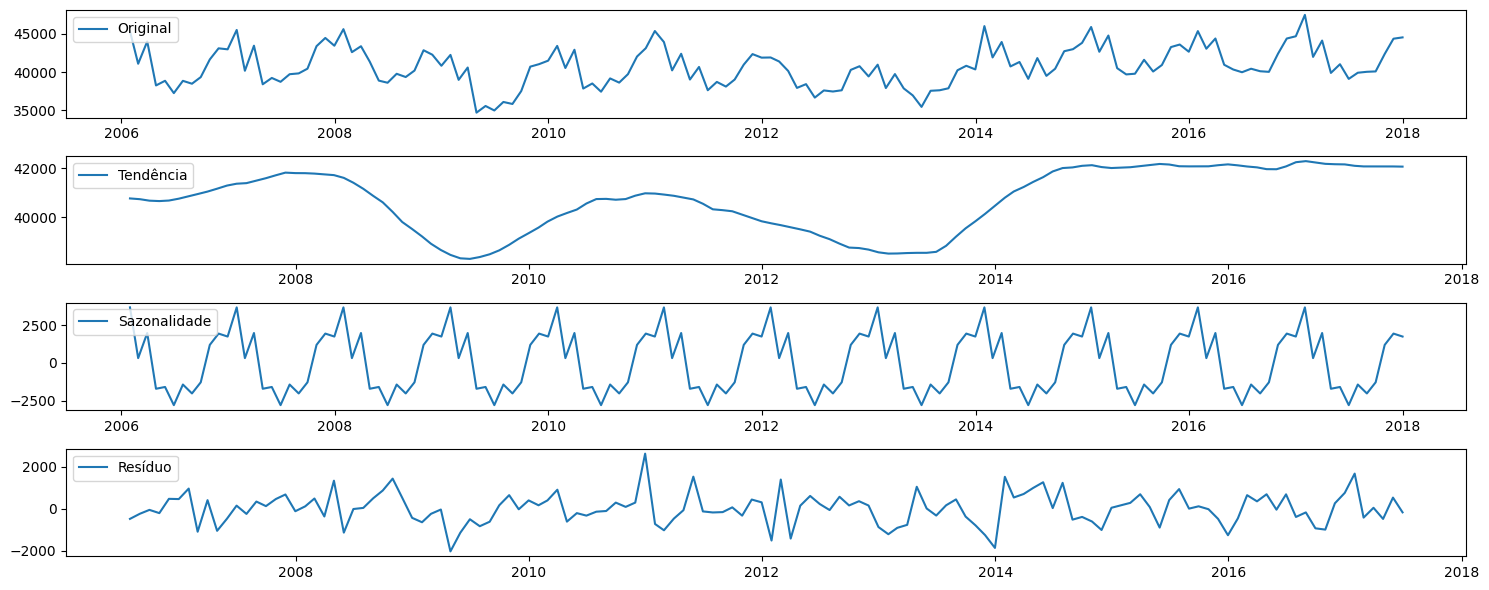

In [15]:
# Criar uma frequencia na série para usar a função de decomposição
rng = pd.date_range('2006 01', periods = len(serie_requisicoes_WEB_mes), freq = 'M')
dados_valor = pd.Series(serie_requisicoes_WEB_mes, index = rng)


decomp = seasonal_decompose(dados_valor)
tendencia = decomp.trend
sazonalidade = decomp.seasonal
residuo = decomp.resid

plt.subplot(411)
plt.plot(dados_valor, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuo, label='Resíduo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Série de requisições mensal ao servidor BD

In [16]:
# Seleciona coluna BD e reformata para requisições mensais (soma)
serie_requisicoes_BD_mes = serie_requisicoes_dia['BD'].resample('M').sum()
serie_requisicoes_BD_mes.head(3)

,BD
Data,
2006-01-31,0.0
2006-02-28,0.0
2006-03-31,0.0


### Visualizar requisições mensais ao servidor BD

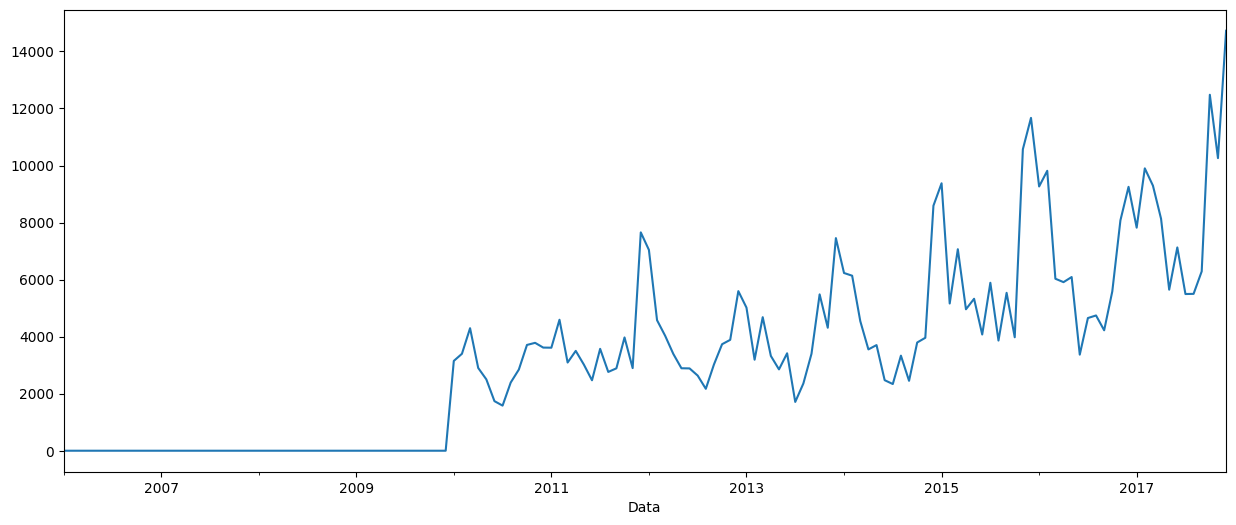

In [17]:
# Plotar WEB
serie_requisicoes_BD_mes.plot();

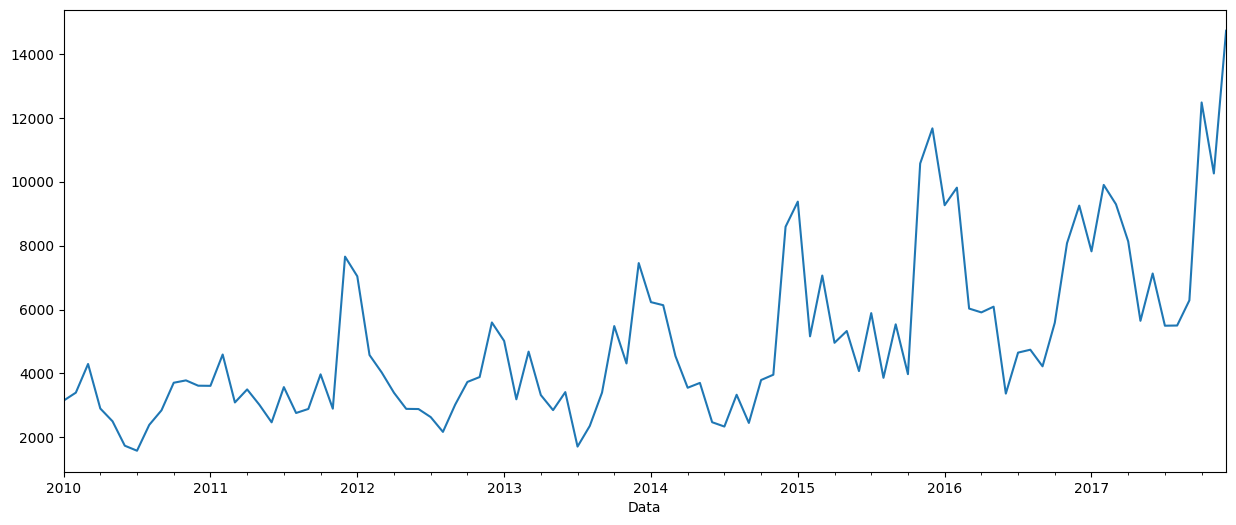

In [18]:
# Selecionar dados a partir de Janeiro de 2010
serie_requisicoes_BD_mes = pd.Series(serie_requisicoes_BD_mes.loc['2010-01':'2017-12'], copy=True)
serie_requisicoes_BD_mes.plot();

### Decompor e plotar a serie de requisições mensal ao servidor BD

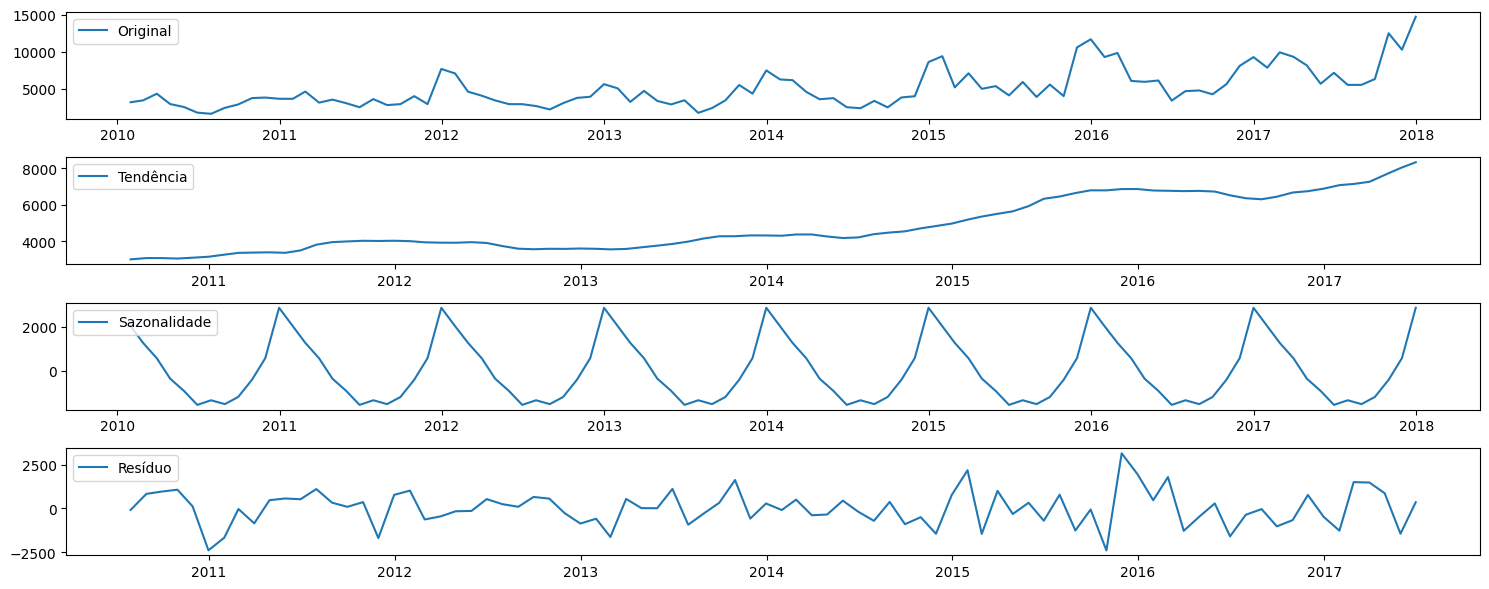

In [19]:
# Criar uma frequencia na série para usar a função de decomposição
rng = pd.date_range('2010 01', periods = len(serie_requisicoes_BD_mes), freq = 'M')
dados_valor = pd.Series(serie_requisicoes_BD_mes, index = rng)


decomp = seasonal_decompose(dados_valor)
tendencia = decomp.trend
sazonalidade = decomp.seasonal
residuo = decomp.resid

plt.subplot(411)
plt.plot(dados_valor, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuo, label='Resíduo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Testar estacionariedade da série de resíduos

In [20]:
residuo.dropna(inplace=True)
teste_ADF(residuo)

Resultados do Teste Dickey-Fuller:
Estatística do teste        -9.152712e+00
p-value                      2.659854e-15
Lags                         0.000000e+00
Quantidade de observações    8.300000e+01
Valor crítico (1%)          -3.511712e+00
Valor crítico (5%)          -2.897048e+00
Valor crítico (10%)         -2.585713e+00
dtype: float64


# Formativa

## Série de requisições mensal ao servidor APLIC

In [21]:
# Seleciona coluna APLIC e reformar para requisições mensais (soma)
serie_requisicoes_APLIC_mes = serie_requisicoes_dia['APLIC'].resample('M').sum()
serie_requisicoes_APLIC_mes.head(3)


,APLIC
Data,
2006-01-31,0.0
2006-02-28,0.0
2006-03-31,0.0


### Visualizar requisições mensais ao servidor APLIC

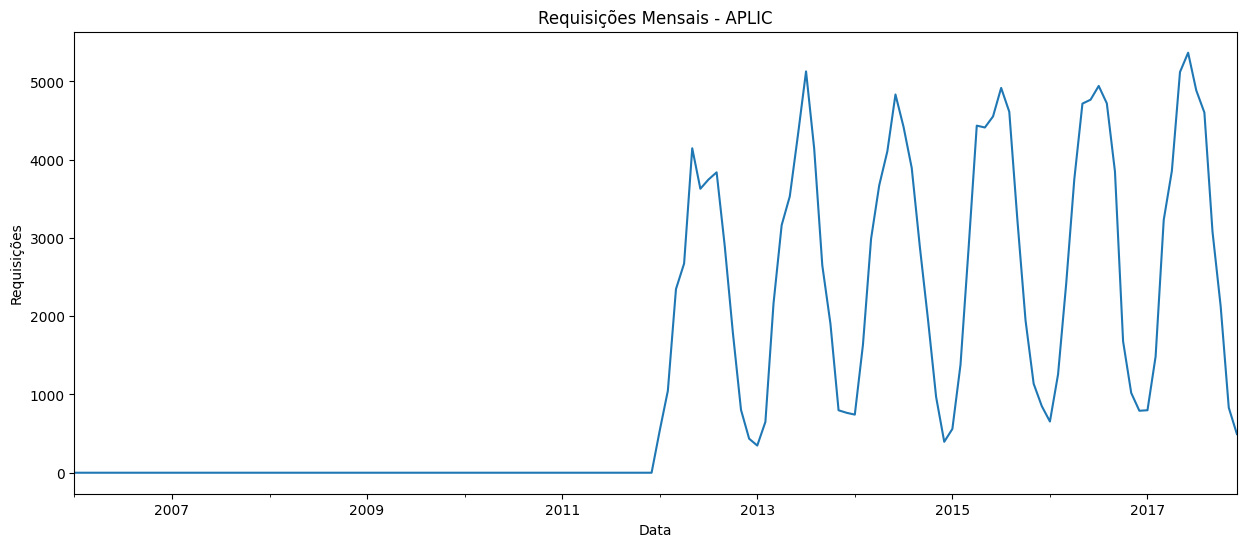

In [22]:
# Plotar APLIC
serie_requisicoes_APLIC_mes.plot(title="Requisições Mensais - APLIC", ylabel="Requisições", xlabel="Data");
plt.show()


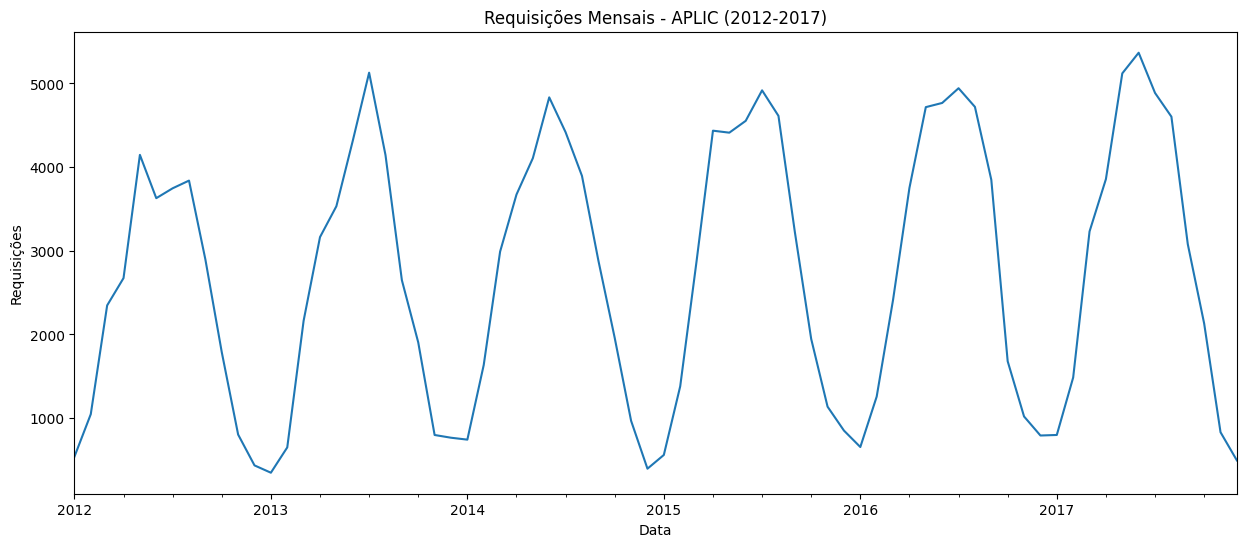

In [23]:
# Selecionar dados a partir de Janeiro de 2012
# Atenção na seleção do início do período

serie_requisicoes_APLIC_mes_2012 = pd.Series(serie_requisicoes_APLIC_mes.loc['2012-01':'2017-12'], copy=True)
serie_requisicoes_APLIC_mes_2012.plot(title="Requisições Mensais - APLIC (2012-2017)", ylabel="Requisições", xlabel="Data");
plt.show()


### Decompor e plotar a serie de requisições mensal ao servidor APLIC

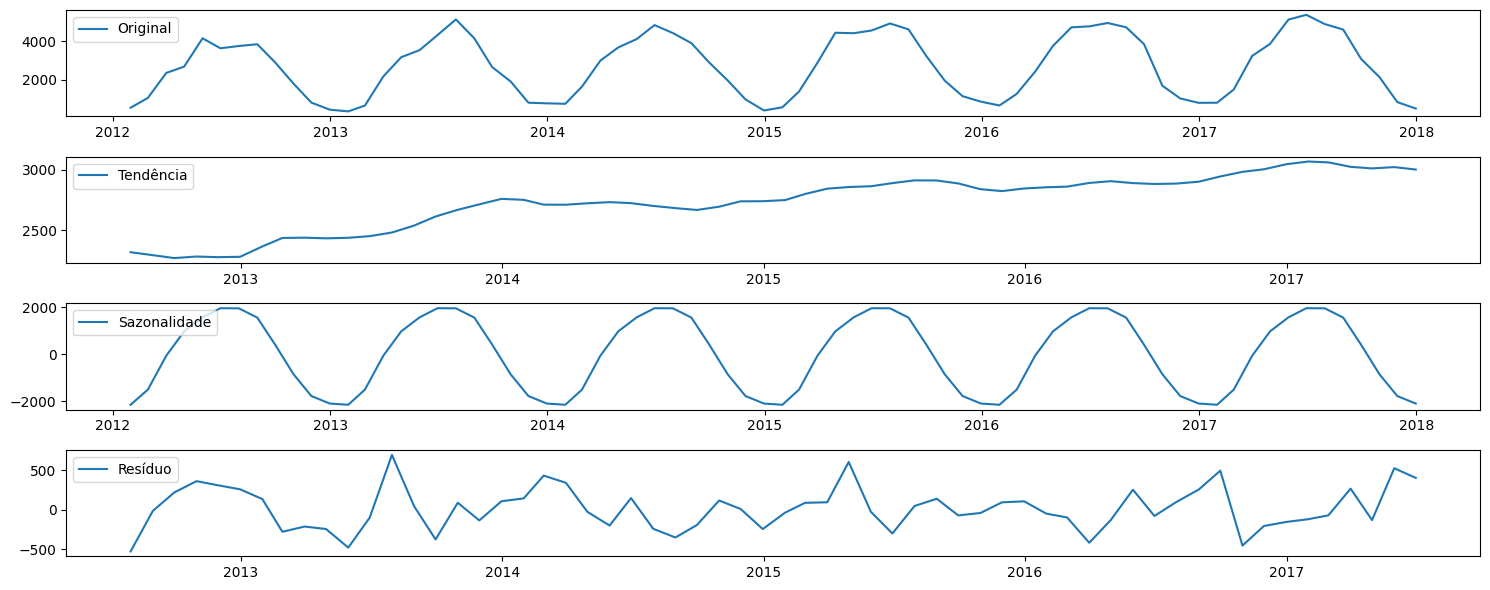

In [24]:
# Criar uma frequência na série para usar a função de decomposição
rng = pd.date_range('2012-01', periods=len(serie_requisicoes_APLIC_mes_2012), freq='M')
dados_valor_APLIC = pd.Series(serie_requisicoes_APLIC_mes_2012, index=rng)

# Realizar a decomposição da série
decomp_APLIC = seasonal_decompose(dados_valor_APLIC)

# Extração das componentes
tendencia_APLIC = decomp_APLIC.trend
sazonalidade_APLIC = decomp_APLIC.seasonal
residuo_APLIC = decomp_APLIC.resid

# Plotar as componentes da decomposição
plt.subplot(411)
plt.plot(dados_valor_APLIC, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(tendencia_APLIC, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sazonalidade_APLIC, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuo_APLIC, label='Resíduo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Testar estacionariedade da série de resíduos

In [25]:
# Testar estacionariedade
residuo_APLIC.dropna(inplace=True)

teste_ADF(residuo_APLIC)



Resultados do Teste Dickey-Fuller:
Estatística do teste         -4.391259
p-value                       0.000308
Lags                         11.000000
Quantidade de observações    48.000000
Valor crítico (1%)           -3.574589
Valor crítico (5%)           -2.923954
Valor crítico (10%)          -2.600039
dtype: float64


# Inserido para facilitar impressão 1

In [26]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

# Inserido para facilitar impressão 2

In [27]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

# Inserido para facilitar impressão 3

In [28]:

#
#
#
#
#
#
#
#
#
#
#
#
#
#